Observed Trends

1)  As expected, temperature is related to latitude.  The larger the absolute value of a location's latitude, the lower the temperature is likely to be.  This results in a parabolic arrangement of the points in the scatter plot.  

2)  None of the other scatter plots reveal very much information.  Humidity, cloudiness, and wind speed appear almost completely unrelated to latitude.  The only thing we might glean from this data is that the higher recorded wind speeds tend to occur further from the equator.

3)  There is a potential problem with this analysis.  I gathered weather data based on a random selection of coordinates, which is correct; each of the 500 data points sits at a unique location.  However, given that 70% of the planet's surface is covered in water, my random coordinates were likely to land in oceans.  When citipy looked up the closest cities to these coordinates, it led to an overrepresentation of coastal cities or cities in extreme locations.  For example, Ushuaia, Argentina, which is the southernmost city in the world, appears eight times in the list.  
    A more advanced method of random coordinate selection would be required to avoid issues like this, perhaps one that is aware of where the Earth's large land masses are located.  
    
4)  I built a bonus scatter plot linking humidity and cloudiness.  I was hoping there would be some relationship, but alas, there is nothing useful there.

In [27]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from citipy import citipy
import random
import matplotlib.axes as ax
import datetime
now = datetime.datetime.now()

# OpenWeatherMap API Key from config
from config import api_key

In [28]:
#GET LIST OF 500 RANDOM LATITUDES AND LONGITUDES

lat = []
lng = []

#Latitude  #limited to (-70,70) to prevent an excess of arctic/antarctic coordinates
for x in range(500):
    lat.append(round(random.uniform(-70,70),2)) 
#Longitude
for x in range(500):
    lng.append(round(random.uniform(-180,180),2))

cities_df = pd.DataFrame({"Latitude": lat,"Longitude":lng, 
                          "City":"", "Country":"", 
                          "Temperature":0,"Humidity":0,"Cloudiness":0,"Wind Speed":0})
cities_df = cities_df[['Latitude','Longitude','City','Country',
                       'Temperature','Humidity','Cloudiness','Wind Speed']]
cities_df.head()

,Latitude,Longitude,City,Country,Temperature,Humidity,Cloudiness,Wind Speed
0,-58.22,-70.26,,,0,0,0,0
1,-40.82,41.40,,,0,0,0,0
2,1.45,-42.62,,,0,0,0,0
3,26.90,58.93,,,0,0,0,0
4,-5.33,-77.99,,,0,0,0,0


In [29]:
#LINK RANDOM COORDINATES TO CITIES USING CITIPY

for index, row in cities_df.iterrows():
    lat = row['Latitude']
    lng = row['Longitude']
    cities_df.loc[index, "City"] = citipy.nearest_city(lat,lng).city_name
    cities_df.loc[index, "Country"] = citipy.nearest_city(lat,lng).country_code
    
cities_df.head()

,Latitude,Longitude,City,Country,Temperature,Humidity,Cloudiness,Wind Speed
0,-58.22,-70.26,ushuaia,ar,0,0,0,0
1,-40.82,41.40,margate,za,0,0,0,0
2,1.45,-42.62,cururupu,br,0,0,0,0
3,26.90,58.93,iranshahr,ir,0,0,0,0
4,-5.33,-77.99,la peca,pe,0,0,0,0


In [30]:
#PULL WEATHER DATA FOR ALL CITIES FROM OPENWEATHERMAP, PRINT RESPONSES

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
counter = 1

print("------------------------------------------")
print("RETRIEVING DATA")
print("------------------------------------------")

for index, row in cities_df.iterrows():
    latitude = row['Latitude']
    longitude = row['Longitude']
    
    query_url = f"{base_url}appid={api_key}&units={units}&lat={latitude}&lon={longitude}"
    
    city = row['City']
    country = row['Country']
    
    response = requests.get(query_url).json()
    
    #Append response data to our DataFrame
    cities_df.loc[index,"Temperature"] = response["main"]["temp"]
    cities_df.loc[index,"Humidity"] = response["main"]["humidity"]
    cities_df.loc[index,"Cloudiness"] = response["clouds"]["all"]
    cities_df.loc[index,"Wind Speed"] = response["wind"]["speed"]
    
    print("City " + str(counter) + ":  " + city + ", " + country)
    print("(" + str(query_url) + ")")
    print("Temperature (F):  " + str(response["main"]["temp"]))
    print("Humidity (%):  " + str(response["main"]["humidity"]))
    print("Cloudiness (%):  " + str(response["clouds"]["all"]))
    print("Wind Speed (MPH):  " + str(response["wind"]["speed"]))
    print("------------------------------------------")
    
    counter = counter + 1

print("FINISHED RETRIEVING DATA")
print("------------------------------------------")
    
#Save DataFrame as csv
cities_df.to_csv("output_analysis/Cities_DataFrame.csv")

------------------------------------------
RETRIEVING DATA
------------------------------------------
City 1:  ushuaia, ar
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-58.22&lon=-70.26)
Temperature (F):  38.75
Humidity (%):  100
Cloudiness (%):  92
Wind Speed (MPH):  22.75
------------------------------------------
City 2:  margate, za
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-40.82&lon=41.4)
Temperature (F):  53.69
Humidity (%):  100
Cloudiness (%):  64
Wind Speed (MPH):  13.42
------------------------------------------
City 3:  cururupu, br
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=1.45&lon=-42.62)
Temperature (F):  80.15
Humidity (%):  100
Cloudiness (%):  32
Wind Speed (MPH):  11.3
------------------------------------------
City 4:  iranshahr, ir
(http://api.openweathermap.org/data/2.5/weather?

City 31:  taoudenni, ml
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=22.85&lon=-3.25)
Temperature (F):  96.35
Humidity (%):  13
Cloudiness (%):  20
Wind Speed (MPH):  13.69
------------------------------------------
City 32:  bethel, us
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=48.08&lon=-163.72)
Temperature (F):  43.88
Humidity (%):  100
Cloudiness (%):  76
Wind Speed (MPH):  12.86
------------------------------------------
City 33:  kawalu, id
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-14.53&lon=107.0)
Temperature (F):  80.6
Humidity (%):  100
Cloudiness (%):  68
Wind Speed (MPH):  22.97
------------------------------------------
City 34:  taolanaro, mg
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-61.97&lon=59.27)
Temperature (F):  17.87

City 61:  carnarvon, au
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-25.42&lon=114.36)
Temperature (F):  50.81
Humidity (%):  87
Cloudiness (%):  0
Wind Speed (MPH):  3.51
------------------------------------------
City 62:  navabad, tj
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=39.34&lon=69.84)
Temperature (F):  37.85
Humidity (%):  95
Cloudiness (%):  92
Wind Speed (MPH):  1.61
------------------------------------------
City 63:  kavaratti, in
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=10.28&lon=74.24)
Temperature (F):  76.01
Humidity (%):  100
Cloudiness (%):  92
Wind Speed (MPH):  9.95
------------------------------------------
City 64:  hobart, au
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-62.2&lon=152.07)
Temperature (F):  33.53
Hum

City 91:  saint-philippe, re
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-52.05&lon=70.09)
Temperature (F):  36.05
Humidity (%):  100
Cloudiness (%):  68
Wind Speed (MPH):  29.91
------------------------------------------
City 92:  meiktila, mm
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=20.66&lon=95.43)
Temperature (F):  75.11
Humidity (%):  94
Cloudiness (%):  88
Wind Speed (MPH):  9.55
------------------------------------------
City 93:  san patricio, mx
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=5.85&lon=-112.56)
Temperature (F):  81.23
Humidity (%):  100
Cloudiness (%):  56
Wind Speed (MPH):  15.82
------------------------------------------
City 94:  belmonte, br
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-18.55&lon=-29.21)
Temperature

City 121:  baruun-urt, mn
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=47.25&lon=113.56)
Temperature (F):  33.53
Humidity (%):  89
Cloudiness (%):  8
Wind Speed (MPH):  7.09
------------------------------------------
City 122:  nioro, ml
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=14.7&lon=-10.17)
Temperature (F):  93.02
Humidity (%):  47
Cloudiness (%):  92
Wind Speed (MPH):  2.51
------------------------------------------
City 123:  orodara, bf
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=11.18&lon=-5.12)
Temperature (F):  78.44
Humidity (%):  85
Cloudiness (%):  0
Wind Speed (MPH):  5.41
------------------------------------------
City 124:  bengkulu, id
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-13.5&lon=93.41)
Temperature (F):  80.6
Humid

City 151:  hithadhoo, mv
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-4.64&lon=65.74)
Temperature (F):  82.13
Humidity (%):  100
Cloudiness (%):  48
Wind Speed (MPH):  10.18
------------------------------------------
City 152:  busselton, au
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-40.84&lon=101.45)
Temperature (F):  53.51
Humidity (%):  100
Cloudiness (%):  92
Wind Speed (MPH):  20.85
------------------------------------------
City 153:  nouadhibou, mr
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=21.66&lon=-17.69)
Temperature (F):  66.2
Humidity (%):  94
Cloudiness (%):  0
Wind Speed (MPH):  26.17
------------------------------------------
City 154:  san miguel de cauri, pe
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-10.22&lon=-76.58)
Te

City 181:  tarko-sale, ru
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=65.13&lon=77.71)
Temperature (F):  35.6
Humidity (%):  96
Cloudiness (%):  76
Wind Speed (MPH):  13.35
------------------------------------------
City 182:  tsihombe, mg
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-47.98&lon=45.43)
Temperature (F):  39.38
Humidity (%):  100
Cloudiness (%):  80
Wind Speed (MPH):  19.35
------------------------------------------
City 183:  quatre cocos, mu
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-16.88&lon=70.03)
Temperature (F):  79.34
Humidity (%):  99
Cloudiness (%):  68
Wind Speed (MPH):  19.91
------------------------------------------
City 184:  maghama, mr
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=17.74&lon=-11.2)
Temperature (F)

City 211:  kapaa, us
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=23.88&lon=-179.12)
Temperature (F):  75.38
Humidity (%):  100
Cloudiness (%):  32
Wind Speed (MPH):  14.65
------------------------------------------
City 212:  hailey, us
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=43.52&lon=-114.29)
Temperature (F):  66.2
Humidity (%):  52
Cloudiness (%):  40
Wind Speed (MPH):  5.82
------------------------------------------
City 213:  rikitea, pf
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-25.65&lon=-130.38)
Temperature (F):  73.67
Humidity (%):  100
Cloudiness (%):  68
Wind Speed (MPH):  14.47
------------------------------------------
City 214:  fuerte olimpo, py
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-21.29&lon=-57.37)
Temperature (F

City 241:  hermanus, za
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-61.26&lon=4.74)
Temperature (F):  32
Humidity (%):  95
Cloudiness (%):  92
Wind Speed (MPH):  24.72
------------------------------------------
City 242:  cape town, za
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-55.95&lon=-5.18)
Temperature (F):  31.1
Humidity (%):  100
Cloudiness (%):  20
Wind Speed (MPH):  23.2
------------------------------------------
City 243:  saulkrasti, lv
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=57.47&lon=24.27)
Temperature (F):  57.2
Humidity (%):  82
Cloudiness (%):  0
Wind Speed (MPH):  5.82
------------------------------------------
City 244:  iqaluit, ca
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=59.93&lon=-68.98)
Temperature (F):  30.2
Hu

City 271:  jambi, id
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-1.82&lon=103.79)
Temperature (F):  73.67
Humidity (%):  98
Cloudiness (%):  88
Wind Speed (MPH):  3.13
------------------------------------------
City 272:  fevralsk, ru
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=54.53&lon=129.64)
Temperature (F):  50.18
Humidity (%):  82
Cloudiness (%):  0
Wind Speed (MPH):  3.58
------------------------------------------
City 273:  saint-philippe, re
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-59.54&lon=74.16)
Temperature (F):  26.51
Humidity (%):  100
Cloudiness (%):  56
Wind Speed (MPH):  23.98
------------------------------------------
City 274:  tabiauea, ki
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=0.44&lon=169.88)
Temperature (F):  

City 301:  madimba, tz
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-9.85&lon=41.78)
Temperature (F):  82.4
Humidity (%):  96
Cloudiness (%):  12
Wind Speed (MPH):  20.62
------------------------------------------
City 302:  mataura, pf
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-65.81&lon=-160.21)
Temperature (F):  29.3
Humidity (%):  96
Cloudiness (%):  88
Wind Speed (MPH):  14.99
------------------------------------------
City 303:  bengkulu, id
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-8.66&lon=100.63)
Temperature (F):  80.42
Humidity (%):  100
Cloudiness (%):  92
Wind Speed (MPH):  12.86
------------------------------------------
City 304:  carutapera, br
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=3.01&lon=-43.5)
Temperature (F):  80

City 331:  tianpeng, cn
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=33.07&lon=102.35)
Temperature (F):  30.65
Humidity (%):  98
Cloudiness (%):  76
Wind Speed (MPH):  2.91
------------------------------------------
City 332:  hithadhoo, mv
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-0.63&lon=71.25)
Temperature (F):  84.65
Humidity (%):  100
Cloudiness (%):  12
Wind Speed (MPH):  17.38
------------------------------------------
City 333:  kailua, us
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=22.59&lon=-157.24)
Temperature (F):  74.75
Humidity (%):  100
Cloudiness (%):  68
Wind Speed (MPH):  16.22
------------------------------------------
City 334:  adrar, dz
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=25.68&lon=4.41)
Temperature (F):  86.27

City 361:  georgetown, sh
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-12.59&lon=-20.04)
Temperature (F):  77
Humidity (%):  100
Cloudiness (%):  24
Wind Speed (MPH):  17.38
------------------------------------------
City 362:  viligili, mv
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=0.03&lon=77.17)
Temperature (F):  84.74
Humidity (%):  100
Cloudiness (%):  68
Wind Speed (MPH):  18.57
------------------------------------------
City 363:  barawe, so
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-4.03&lon=48.35)
Temperature (F):  77.36
Humidity (%):  100
Cloudiness (%):  80
Wind Speed (MPH):  11.45
------------------------------------------
City 364:  tsihombe, mg
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-46.01&lon=49.77)
Temperature (F):  40

City 391:  isangel, vu
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-19.77&lon=169.66)
Temperature (F):  72.23
Humidity (%):  100
Cloudiness (%):  92
Wind Speed (MPH):  21.47
------------------------------------------
City 392:  sentyabrskiy, ru
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=32.03&lon=161.46)
Temperature (F):  74.93
Humidity (%):  93
Cloudiness (%):  8
Wind Speed (MPH):  23.98
------------------------------------------
City 393:  nome, us
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=59.55&lon=-168.0)
Temperature (F):  37.22
Humidity (%):  100
Cloudiness (%):  88
Wind Speed (MPH):  6.31
------------------------------------------
City 394:  bethel, us
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=64.12&lon=-158.66)
Temperature (F):  5

City 421:  taolanaro, mg
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-59.67&lon=56.14)
Temperature (F):  29.48
Humidity (%):  100
Cloudiness (%):  64
Wind Speed (MPH):  20.18
------------------------------------------
City 422:  marrakesh, ma
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=29.31&lon=-5.4)
Temperature (F):  76.64
Humidity (%):  13
Cloudiness (%):  0
Wind Speed (MPH):  11.07
------------------------------------------
City 423:  malavalli, in
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=12.43&lon=77.24)
Temperature (F):  67.73
Humidity (%):  97
Cloudiness (%):  24
Wind Speed (MPH):  2.28
------------------------------------------
City 424:  busselton, au
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-44.85&lon=89.85)
Temperature (F):  

City 451:  cidreira, br
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-57.41&lon=-23.53)
Temperature (F):  34.16
Humidity (%):  95
Cloudiness (%):  88
Wind Speed (MPH):  23.87
------------------------------------------
City 452:  camacha, pt
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=38.53&lon=-18.27)
Temperature (F):  60.62
Humidity (%):  99
Cloudiness (%):  68
Wind Speed (MPH):  13.8
------------------------------------------
City 453:  saint george, bm
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=32.2&lon=-57.27)
Temperature (F):  75.02
Humidity (%):  100
Cloudiness (%):  0
Wind Speed (MPH):  1.57
------------------------------------------
City 454:  chuy, uy
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-37.32&lon=-47.78)
Temperature (F):  65

City 481:  kaeo, nz
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-31.26&lon=174.07)
Temperature (F):  64.85
Humidity (%):  100
Cloudiness (%):  12
Wind Speed (MPH):  21.47
------------------------------------------
City 482:  hermanus, za
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-55.84&lon=15.11)
Temperature (F):  35.6
Humidity (%):  90
Cloudiness (%):  92
Wind Speed (MPH):  28.63
------------------------------------------
City 483:  sobolevo, ru
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=55.58&lon=156.73)
Temperature (F):  38.39
Humidity (%):  100
Cloudiness (%):  88
Wind Speed (MPH):  4.59
------------------------------------------
City 484:  samusu, ws
(http://api.openweathermap.org/data/2.5/weather?appid=4de1f9a161b367d3b8a738b0edb16cdb&units=imperial&lat=-4.1&lon=-161.6)
Temperature (F):  81.68


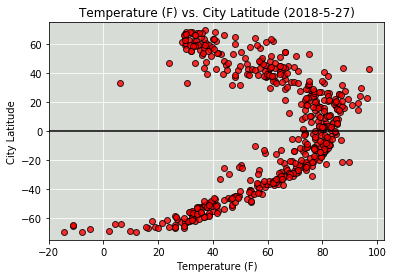

In [41]:
# BUILD A SCATTER PLOT FOR TEMPERATURE (F) vs LATITUDE

plt.scatter(x=cities_df['Temperature'],
            y=cities_df['Latitude'],
            edgecolor="black", color = 'r',
            linewidths=1, marker="o", alpha=0.8,
            zorder=2)

# Incorporate the other graph properties
plt.title("Temperature (F) vs. City Latitude (" + str(now.year) + "-" + str(now.month) + "-" + str(now.day) + ")")
plt.ylabel("City Latitude")
plt.xlabel("Temperature (F)")
plt.grid(color='white',zorder=1)
plt.ylim([-75, 75])
ax = plt.gca()
ax.set_facecolor('xkcd:light grey')
ax.axhline(0, color='black')

# Save the figure
plt.savefig("output_analysis/Temperature_Latitude.png")

# Show plot
plt.show()

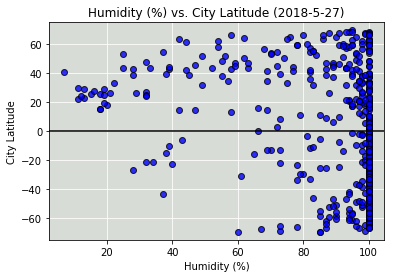

In [42]:
# BUILD A SCATTER PLOT FOR HUMIDITY (%) vs LATITUDE

plt.scatter(x=cities_df['Humidity'],
            y=cities_df['Latitude'],
            edgecolor="black", color = 'b',
            linewidths=1, marker="o", alpha=0.8,
            zorder=2)

# Incorporate the other graph properties
plt.title("Humidity (%) vs. City Latitude (" + str(now.year) + "-" + str(now.month) + "-" + str(now.day) + ")")
plt.ylabel("City Latitude")
plt.xlabel("Humidity (%)")
plt.grid(color='white',zorder=1)
plt.ylim([-75, 75])
ax = plt.gca()
ax.set_facecolor('xkcd:light grey')
ax.axhline(0, color='black')

# Save the figure
plt.savefig("output_analysis/Humidity_Latitude.png")

# Show plot
plt.show()

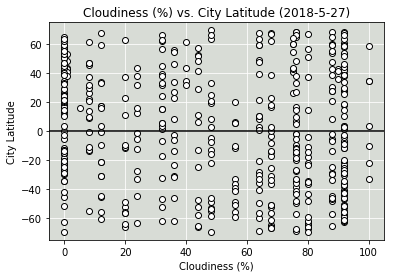

In [43]:
# BUILD A SCATTER PLOT FOR CLOUDINESS (%) vs LATITUDE

plt.scatter(x=cities_df['Cloudiness'],
            y=cities_df['Latitude'],
            edgecolor="black", color = 'w',
            linewidths=1, marker="o", alpha=1,
            zorder=2)

# Incorporate the other graph properties
plt.title("Cloudiness (%) vs. City Latitude (" + str(now.year) + "-" + str(now.month) + "-" + str(now.day) + ")")
plt.ylabel("City Latitude")
plt.xlabel("Cloudiness (%)")
plt.grid(color='white',zorder=1)
plt.ylim([-75, 75])
ax = plt.gca()
ax.set_facecolor('xkcd:light grey')
ax.axhline(0, color='black')

# Save the figure
plt.savefig("output_analysis/Cloudiness_Latitude.png")

# Show plot
plt.show()

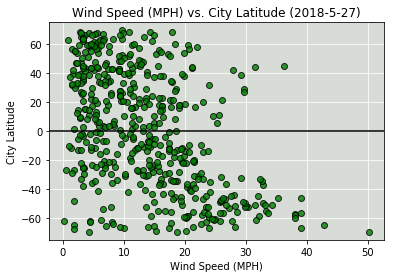

In [44]:
# BUILD A SCATTER PLOT FOR WIND SPEED (MPH) vs LATITUDE

plt.scatter(x=cities_df['Wind Speed'],
            y=cities_df['Latitude'],
            edgecolor="black", color = 'g',
            linewidths=1, marker="o", alpha=0.8,
            zorder=2)

# Incorporate the other graph properties
plt.title("Wind Speed (MPH) vs. City Latitude (" + str(now.year) + "-" + str(now.month) + "-" + str(now.day) + ")")
plt.ylabel("City Latitude")
plt.xlabel("Wind Speed (MPH)")
plt.grid(color='white',zorder=1)
plt.ylim([-75, 75])
ax = plt.gca()
ax.set_facecolor('xkcd:light grey')
ax.axhline(0, color='black')

# Save the figure
plt.savefig("output_analysis/WindSpeed_Latitude.png")

# Show plot
plt.show()

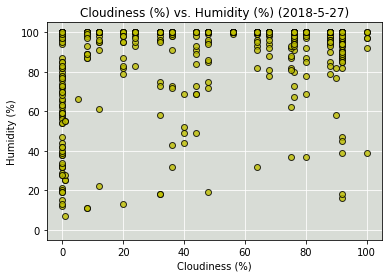

In [45]:
### BONUS
# BUILD A SCATTER PLOT FOR CLOUDINESS (%) vs HUMIDITY (%)

plt.scatter(x=cities_df['Cloudiness'],
            y=cities_df['Humidity'],
            edgecolor="black", color = 'y',
            linewidths=1, marker="o", alpha=0.8,
            zorder=2)

# Incorporate the other graph properties
plt.title("Cloudiness (%) vs. Humidity (%) (" + str(now.year) + "-" + str(now.month) + "-" + str(now.day) + ")")
plt.ylabel("Humidity (%)")
plt.xlabel("Cloudiness (%)")
plt.xlim([-5,105])
plt.ylim([-5,105])
plt.grid(color='white',zorder=1)
ax = plt.gca()
ax.set_facecolor('xkcd:light grey')

# Save the figure
plt.savefig("output_analysis/Cloudiness_Humidity.png")

# Show plot
plt.show()